<a href="https://colab.research.google.com/github/rxgvnd/Machine-Learning/blob/master/W03_IraSuryani_31410.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Ira Suryani Anggraini - 00000031410
#Categorical Features
data = [
    {'price' : 850000, 'room' : 4, 'neighborhood':'Queen Anne'},
    {'price' : 700000, 'room' : 3, 'neighborhood':'Fremont'},
    {'price' : 650000, 'room' : 3, 'neighborhood':'Walligford'},
    {'price' : 650000, 'room' : 4, 'neighborhood':'Queen Anne'}
]

In [2]:
{'Queen Anne': 1, 'Fremont': 2, 'Wallingford': 3}

{'Fremont': 2, 'Queen Anne': 1, 'Wallingford': 3}

In [3]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse = False, dtype = int)
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     0,      1,      0, 650000,      4]])

In [4]:
vec.get_feature_names()

['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Walligford',
 'price',
 'room']

In [5]:
vec = DictVectorizer(sparse=True, dtype=int)
vec.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [6]:
#Text Features
sample = ['problem of evil', 'evil queen', 'horizon problem']

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
x = vec.fit_transform(sample)
x

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [8]:
import pandas as pd
pd.DataFrame(x.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
x = vec.fit_transform(sample)
pd.DataFrame(x.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


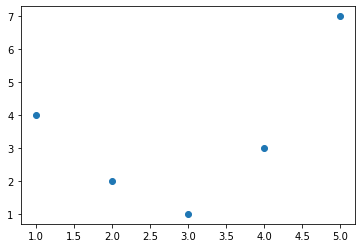

In [10]:
#Derived Features
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

X = np.array([1,2,3,4,5])
y = np.array([4,2,1,3,7])
plt.scatter(X,y)

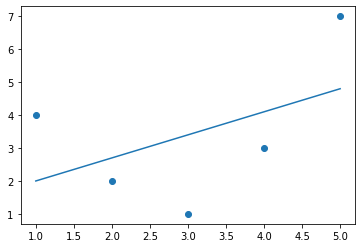

In [11]:
from sklearn.linear_model import LinearRegression
x = X[:, np.newaxis]
model = LinearRegression().fit(x, y)
yfit = model.predict(x)
plt.scatter(X,y)
plt.plot(X,yfit)

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
x2 = poly.fit_transform(x)
print(x2)

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


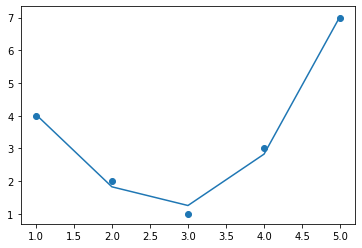

In [13]:
model = LinearRegression().fit(x2,y)
yfit = model.predict(x2)
plt.scatter(X,y)
plt.plot(X,yfit)

In [14]:
#Image Features
#feature engineering image: Application --> a face detection pipeline
#This Lead on feature extraction method for image dataset
#we use Histogram of Oriented Gradient (HOG) as a feature extraction

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

Text(0.5, 1.0, 'visualization of HOG Features')

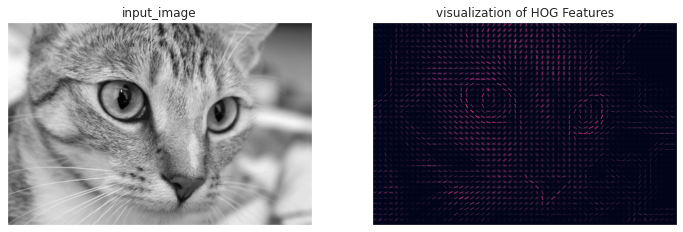

In [15]:
#HOG Features
from skimage import data, color, feature
import skimage

image = color.rgb2gray(data.chelsea())
hog_vec, hog_vis = feature.hog(image, visualize = True)

fig, ax = plt.subplots(1,2, figsize=(12,6),
                       subplot_kw=dict(xticks=[],yticks=[]))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('input_image')

ax[1].imshow(hog_vis)
ax[1].set_title('visualization of HOG Features')

In [16]:
#HOG in Action: A Simple Face Detector
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people()
positive_patches = faces.images
positive_patches.shape

(13233, 62, 47)

In [17]:
from skimage import data, transform
img_to_use = ['camera', 'text', 'coins', 'moon',
              'page', 'clock', 'immunohistochemistry',
              'chelsea', 'coffee', 'hubble_deep_field']

images = [color.rgb2gray(getattr(data,name)()) for name in img_to_use]

In [18]:
from sklearn.feature_extraction.image import PatchExtractor
def extract_patches(img, N, scale=1.0, patch_size=positive_patches[0].shape):
  extracted_patch_size = tuple((scale * np.array(patch_size)).astype(int))
  extractor = PatchExtractor(patch_size= extracted_patch_size,
                             max_patches=N, random_state=0)
  patches = extractor.transform(img[np.newaxis])
  if scale !=1:
    patches = np.array([transform.resize(patch, patch_size)
                        for patch in patches])
  return patches

negative_patches = np.vstack([extract_patches(im,1000,scale)
                    for im in images for scale in [0.5, 1.0, 2.0]])
negative_patches.shape

(30000, 62, 47)

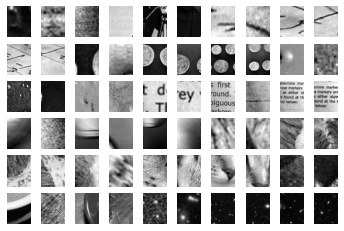

In [19]:
fig, ax = plt.subplots(6, 10)
for i, axi in enumerate(ax.flat):
  axi.imshow(negative_patches[500 * i], cmap='gray')
  axi.axis('off')

In [20]:
from itertools import chain
X_train = np.array([feature.hog(im)
                    for im in chain(positive_patches,
                                    negative_patches)])
y_train = np.zeros(X_train.shape[0])
y_train[:positive_patches.shape[0]] = 1

In [21]:
X_train.shape

(43233, 1215)

In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

cross_val_score(GaussianNB(), X_train, y_train)

array([0.94772754, 0.97189777, 0.97236036, 0.97490169, 0.97374508])

In [23]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(LinearSVC(), {'C':[1.0, 2.0, 4.0, 8.0]})
grid.fit(X_train, y_train)
grid.best_score_

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

0.9884347203194052

In [24]:
grid.best_params_

{'C': 1.0}

In [25]:
model = grid.best_estimator_
model.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

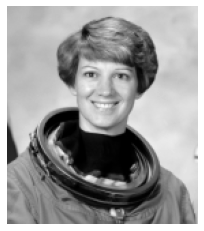

In [26]:
test_image = skimage.data.astronaut()
test_image = skimage.color.rgb2gray(test_image)
test_image = skimage.transform.rescale(test_image, 0.5)
test_image = test_image[:160, 40:180]

plt.imshow(test_image, cmap='gray')
plt.axis('off');

In [27]:
def sliding_window(img, patch_size=positive_patches[0].shape,
                   istep=2, jstep=2, scale=1.0):
  Ni, Nj = (int(scale*s) for s in patch_size)
  for i in range(0, img.shape[0] - Ni, istep):
    for j in range(0, img.shape[1] - Ni, jstep):
      patch = img[i:i + Ni, j:j + Nj]
      if scale != 1:
        patch = transform.resize(patch, patch_size)
      yield (i, j), patch

indices, patches = zip(*sliding_window(test_image))
patches_hog = np.array([feature.hog(patch) for patch in patches])
patches_hog.shape

(1911, 1215)

In [28]:
labels = model.predict(patches_hog)
labels.sum()

49.0

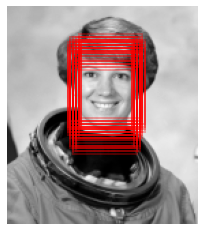

In [29]:
fig, ax = plt.subplots()
ax.imshow(test_image, cmap='gray')
ax.axis('off')

Ni, Nj = positive_patches[0].shape
indices = np.array(indices)

for i, j in indices[labels == 1]:
  ax.add_patch(plt.Rectangle((j, i), Nj, Ni, edgecolor='red',
                             alpha=0.3, lw=2, facecolor='none'))

In [30]:
#Feature Pipelines
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

model = make_pipeline(SimpleImputer(strategy='mean'),
                      PolynomialFeatures(degree=2),
                      LinearRegression())

In [33]:
model.fit(x,y)
print(y)
print(model.predict(x))

[4 2 1 3 7]
[4.14285714 1.62857143 1.25714286 3.02857143 6.94285714]


In [34]:
# Principal Component Analysis 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

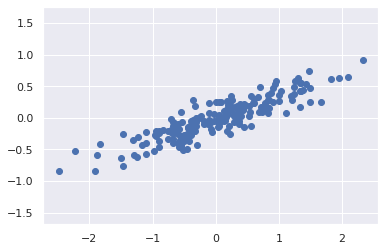

In [35]:
# Generate the 200 points
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [37]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [38]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


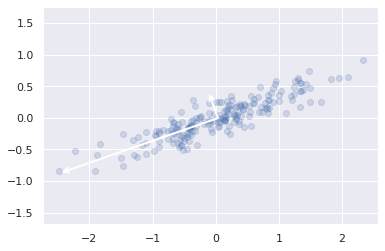

In [39]:
# visualize them as vectors over the input data using the “component” to define the direction of the vector and the “explained variance” to define the squared-length of the vector.
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                   linewidth=2,
                   shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)
    
# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [40]:
#PCA as dimensionality reduction 
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:     ", X.shape)
print("transformed shape:  ",X_pca.shape)

original shape:      (200, 2)
transformed shape:   (200, 1)


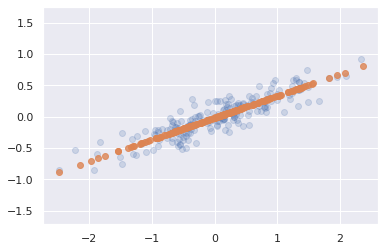

In [41]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

In [42]:
#Choosing the number of component 
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

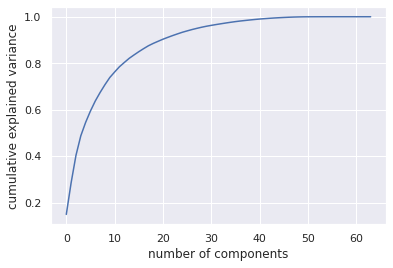

In [43]:
#Calculating the cumulative explained variance ratio
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

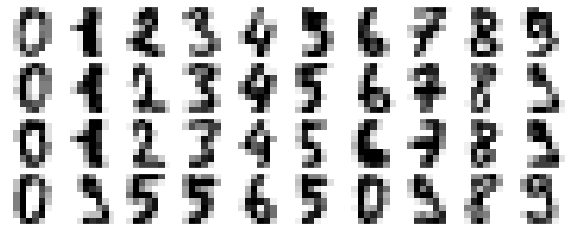

In [44]:
#pca as noise filtering
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

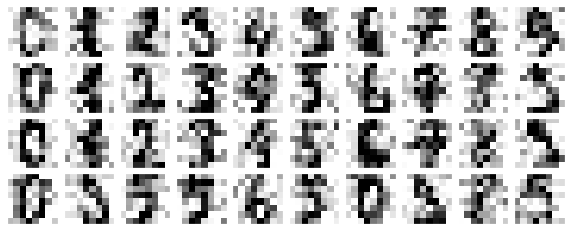

In [45]:
#  add some random noise to create a noisy dataset
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [46]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

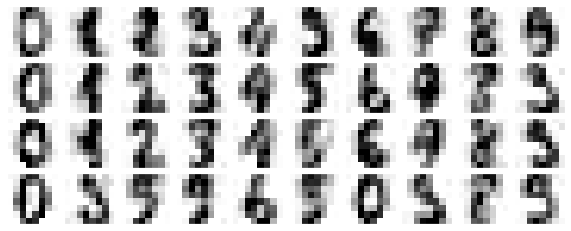

In [47]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)